In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('data/Rent Data.xlsx');df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [3]:
df.isnull().sum()

area    0
rent    0
dtype: int64

In [4]:
df.describe()

,area,rent
count,29.000000,29.000000
mean,2259.310345,36702.068966
std,531.412747,11723.454019
min,1200.000000,20000.000000
25%,1900.000000,31000.000000
50%,2110.000000,34100.000000
75%,2700.000000,47000.000000
max,3500.000000,70000.000000


In [5]:
df.shape

(29, 2)

In [6]:
x = df[['area']]
y = df['rent']

In [7]:
import matplotlib.pyplot as plt

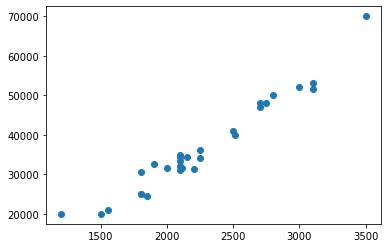

In [8]:
plt.scatter(x,y)

In [9]:
from sklearn.model_selection import train_test_split

In [41]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.30,random_state=42)

In [42]:
xtrain.shape

(20, 1)

In [43]:
ytrain.shape

(20,)

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lr = LinearRegression()

In [46]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [47]:
lr.intercept_

-8754.300392865101

In [48]:
lr.coef_

array([19.86671162])

In [49]:
lr.score(xtest,ytest)

0.921744133304477

In [19]:
df['predicted_rent'] = lr.predict(x);df.head()

,area,rent,predicted_rent
0,2000,31500,30979.122838
1,2100,35000,32965.793999
2,2500,41050,40912.478645
3,2250,36100,35945.800742
4,3000,52100,50845.834453


In [20]:
y_pred = lr.predict(xtest)

In [21]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,log_loss

In [22]:
mean_squared_error(ytest, lr.predict(xtest))

13580774.298011921

In [23]:
import math

In [24]:
math.sqrt(mean_squared_error(ytest, lr.predict(xtest)))

3685.210210830845

In [25]:
mean_absolute_error(ytest,y_pred)

2723.435042679973

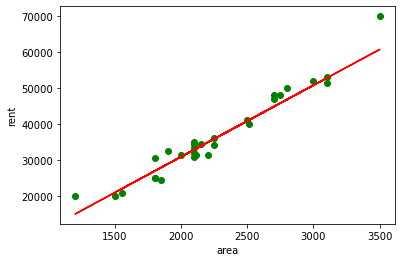

In [26]:
plt.scatter(x,y,color='green')
plt.xlabel('area')
plt.ylabel('rent')
plt.plot(df.area,df['predicted_rent'],color='red')

In [27]:
lr.predict([[2000]])

array([30979.12283782])

In [28]:
import joblib as jbl

In [29]:
jbl.dump(lr,'models/rent_lr_model')

['models/rent_lr_model']

In [30]:
model = jbl.load('models/rent_lr_model')

In [31]:
model.predict([[1500]])

array([21045.76703015])